# Cefron Analytical Solutions to the GS equation

## Introduction
Cefron found analytical solutions to the Grad-Shafranov equation. We are going to cover the important aspects of his derivation and compare process/solution of his approach to that of PINN's approach. <br>
Here's the Grad-Shafranov equation: <br>
$$ 

R\frac{\partial}{\partial R}
                        \left(
                            \frac{1}{R}
                            \frac{\partial \Psi}{\partial R}
                        \right)\,
                        +\, 
                        \frac{\partial^2 \Psi}{\partial Z^2}\,
                        =\,
-\mu_{0}R^2\frac{dp}{d\Psi}-F\frac{dF}{d\Psi}
$$ 
Both p and F are free functions of  $\Psi$ which, along with the boundary conditions, determine the nature of the equilibrium. <br>
Through the normalization $R=R_{0}x, Z=R_{0}y$, and $\Psi = \Psi_{0}\psi$ where $R_{0}$ is the major radius of the palsma and $\Psi_{0}$ is an arbitrary constant. GS equation becomes:
$$ 

x\frac{\partial}{\partial x}
                        \left(
                            \frac{1}{x}
                            \frac{\partial \Psi}{\partial x}
                        \right)\,
                        +\, 
                        \frac{\partial^2 \Psi}{\partial y^2}\,
                        =\,
-\mu_{0}\frac{R_{0}^4}{\Psi_{0}^2}x^2\frac{dp}{d\Psi}-\frac{R_{0}^2}{\Psi_{0}^2}F\frac{dF}{d\Psi}
 $$ 
Now we are going to choose Solov'ev profiles:
$$
-\mu_{0}\frac{R_{0}^4}{\Psi_{0}^2}x^2\frac{dp}{d\Psi}\,
    = C 
$$
$$
\frac{R_{0}^2}{\Psi_{0}^2}F\frac{dF}{d\Psi}\,
    = A
$$

Now let's look at the boundary constrations and boundary cross section. The parametric equations for the boundary cross section are:
$$
x = 1 + \varepsilon \cos(\tau+\alpha \sin\tau) \\
y = \varepsilon\kappa\sin(\tau)
$$
$\tau$ is a parameter covering the range $0\leq\tau\leq 2\pi$. $\varepsilon$ is the inverse aspect ratio $a/R_{0}$, $\kappa$ is the elongation, and $\sin\alpha = \delta$ is the triangularity. For convex plasma surfaces the triangularity is limited to the range $\delta\leq\sin(1)\approx0.841$. <br>
Let's plot this parametric equations.

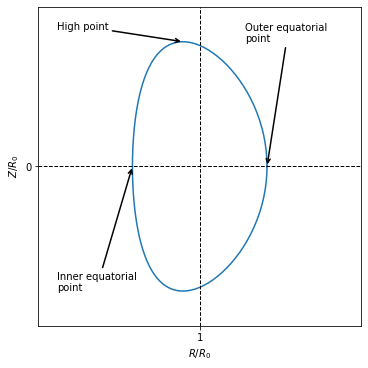

In [1]:
# Plotting the boundary of the cross section
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=1)

eps = 0.25
delta = 0.25
kappa = 2.5

# Prepare arrays x, y, z
tau = np.linspace(0 , 2 * np.pi, 100)
x = 1 + eps*np.cos(tau+np.arcsin(delta)*np.sin(tau))
y = eps * kappa * np.sin(tau)

ax.plot(x, y)
ax.axhline(y=0.0, linestyle='--', linewidth=1, color='black')
ax.axvline(x=1.0, linestyle='--', linewidth=1, color='black')
ax.axis(xmin=0.4,xmax=1.6,ymin=-0.8, ymax=0.8)
x_ticks = np.array([1])
ax.set_xticks(x_ticks)
y_ticks = np.array([0])
ax.set_yticks(y_ticks)

# Axis Label
ax.set_xlabel("$R/R_{0}$")
ax.set_ylabel("$Z/R_{0}$")


# Annotate
plt.annotate('High point',xy=(1-delta*eps,kappa*eps),xytext=((1-delta*eps)*0.5,(kappa*eps)*1.1),
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.annotate('Inner equatorial \npoint',xy=(1-eps,0),xytext=((1-delta*eps)*0.5,-kappa*eps*1.0),
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.annotate('Outer equatorial \npoint',xy=(1+eps,0),xytext=((1+delta*eps)*1.1,+kappa*eps*1.0),
             arrowprops=dict(arrowstyle='->',lw=1.5))


plt.show()

## Field Reversed Configuration
Now that we have set up the underlying parameter and concepts. Let's apply the boundary constraints and the shape parameters to find the analytical solution. The baseline design of the ITER has the following parameters:  $\varepsilon = 0.95$, $\kappa = 10$, and $\delta = 0.7$. 

In [6]:
# plot window size
PLOT_PARAM = {"xmin": -10.1, "xmax": 10.1, "ymin": -2.1,"ymax":2.1}
# contour levels
D = np.linspace(-0.4,0.0,11)

### Analytical Solution

In [7]:
import sys; sys.path.insert(0, '../../utils/')
from gs_solovev_sol import GS_Linear

Frc = GS_Linear(A=0.0, eps= 0.99, kappa=10.0, delta=0.7, divertor=False,beta_limit=False)
# make mesh
nx = 101
ny = 101
zoom = 0.2
inner_point = (1 - Frc.eps*(1+zoom))
outer_point = (1 + Frc.eps*(1+zoom))
high_point  = (Frc.kappa * Frc.eps*(1+zoom) )
low_point   = (-Frc.kappa * Frc.eps*(1+zoom) )
x, y = np.meshgrid(
    np.sort(np.append(np.linspace(inner_point, outer_point , nx),
                np.linspace(-outer_point, -inner_point, nx))),
    np.linspace(low_point, 
                high_point, ny),
)

X = np.vstack((np.ravel(x), np.ravel(y))).T

# Normalize and skew to set zero at boundary (Why isn't it zero already?)
psi_true = Frc.visualize(X,np.shape(x)[0],np.shape(x)[1])
# psi_true[psi_true>0.0] = 0.0
psi_frc = psi_true


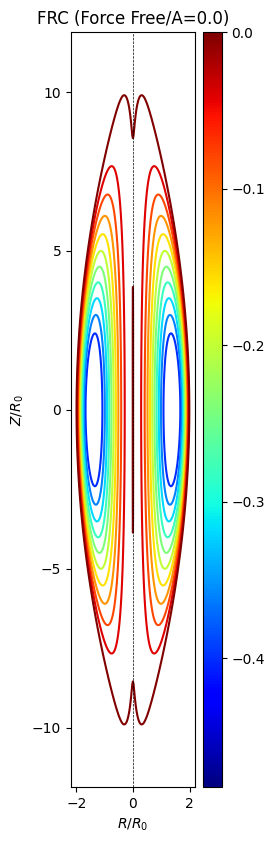

In [11]:
from matplotlib.pyplot import colorbar, Normalize, show, subplots
from matplotlib.cm import ScalarMappable, jet, inferno
plt.rcParams['figure.dpi'] = 100
# Plot psi_true
fig,ax=plt.subplots(1,1,figsize=(2,10))

norm = Normalize(vmin=np.min(psi_frc), vmax=0)
cmap = jet
sm = ScalarMappable(cmap=cmap, norm=norm)
cp = ax.contour(x, y, psi_frc,norm=norm,cmap=cmap, levels=D)
colorbar(sm, ax=ax,aspect=40)
ax.set_title(f'FRC (Force Free/A={Frc.A})')
ax.set_xlabel('$R/R_{0}$')
ax.set_ylabel('$Z/R_{0}$')
ax.axis(xmin= -1*outer_point,xmax=1*outer_point,ymin=low_point, ymax=high_point)
ax.axvline(x=0.0, linestyle='--', linewidth=0.5, color='black')

plt.show()

